### Алгоритмические основы распознавания изображений
#### Лабораторная работа №3.
Задание 2. Реализовать алгоритм поворота Оуэна-Македона (для всего изображения сразу).

In [66]:
from PIL import Image, ImageDraw
import math

In [67]:
colorGray = (127, 127, 127)

# angle of rotation
alpha = 60

# values for moving the coordinates
shift1 = - math.tan(math.radians(alpha)) / 2
shift2 = math.sin(math.radians(alpha))

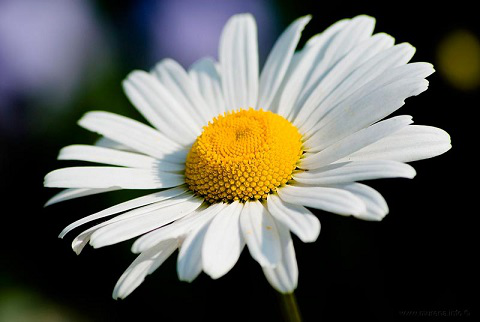

In [68]:
# original image
im_original = Image.open("test7.jpg") 
im_original

In [78]:
def _preparation_(image_old, step_number):
 
    # load pixels values of old image
    pix_old = image_old.load()

    # size of old image
    size_old = image_old.size

    # center of old image 
    x_center_old = math.ceil(size_old[0] / 2)
    y_center_old = math.ceil(size_old[1] / 2)
    
    # size of new image
    if (step_number == 1):
        size_new = [size_old[0] * 2, size_old[1]]
        
    elif (step_number == 2):
        size_new = [size_old[0], size_old[1] * 2]
        
    elif (step_number == 3):
        size_new = [math.ceil((size_old[0] ** 2 + size_old[1] ** 2) ** (1 / 2) / 2), 
                    math.ceil((size_old[0] ** 2 + size_old[1] ** 2) ** (1 / 2) / 2)]
        
    # center of new image
    x_center_new = math.ceil(size_new[0] / 2)
    y_center_new = math.ceil(size_new[1] / 2)
    
    # new image
    image_new = Image.new("RGB", (size_new[0], size_new[1]), colorGray)  
    
    return [pix_old, size_old, x_center_old, y_center_old, x_center_new, y_center_new, image_new]

In [79]:
def _step_(image_old, step_number):
    
    [pix_old, size_old, x_center_old, y_center_old, x_center_new, y_center_new, image_new] = _preparation_(image_old, step_number)

    # create a tool for painting
    draw = ImageDraw.Draw(image_new)
    
    for x_old in range(0, size_old[0]):
        for y_old in range(0, size_old[1]):
            
            if (step_number == 1 or step_number == 3):
            
                x_new = (x_old - x_center_old) + (y_old - y_center_old) * shift1 + x_center_new
                y_new = (y_old - y_center_old) + y_center_new
            
            elif (step_number == 2):
                
                x_new = (x_old - x_center_old) + x_center_new
                y_new = (x_old - x_center_old) * shift2 + (y_old - y_center_old) + y_center_new
            
            draw.point((x_new, y_new), pix_old[x_old, y_old])

    # delete the tool for painting
    del draw
    
    return image_new

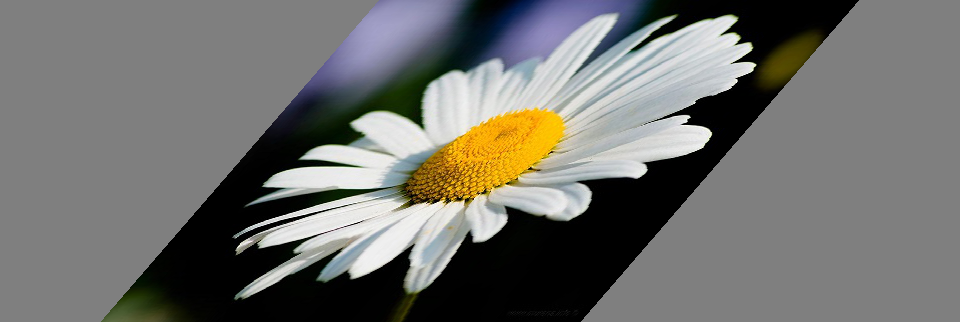

In [80]:
step_1 = _step_(im_original, 1)
step_1

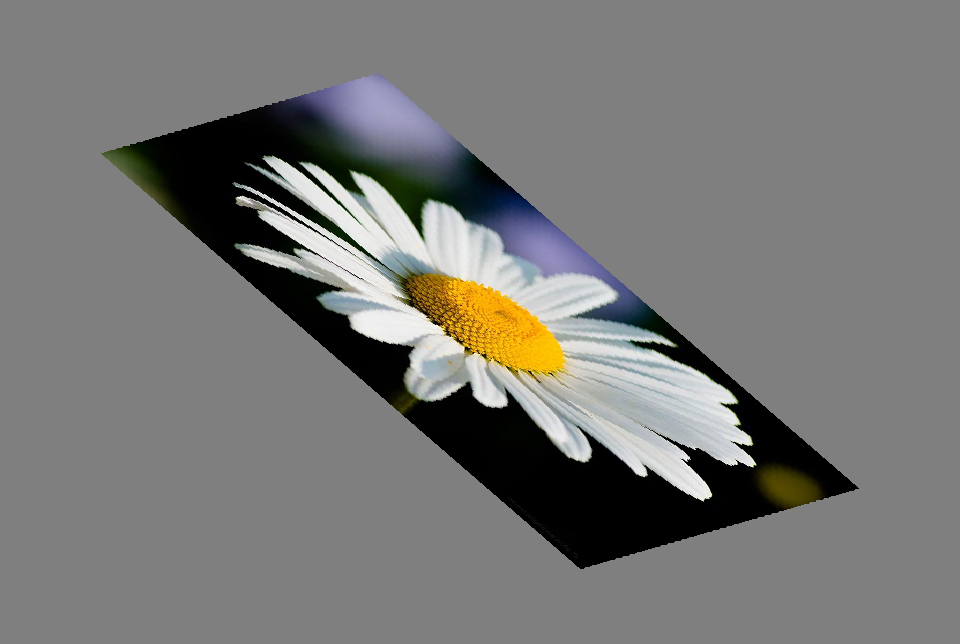

In [81]:
step_2 = _step_(step_1, 2)
step_2

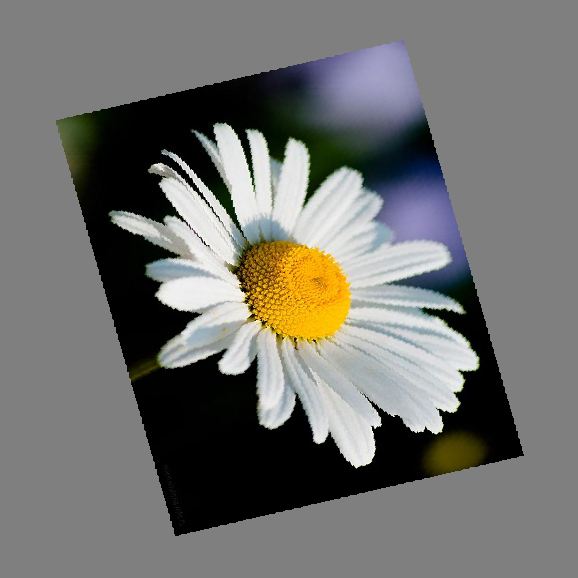

In [82]:
step_3 = _step_(step_2, 3)
step_3